In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# using genfromtxt()
data_mDOM = np.genfromtxt("./files/mDOM_effective_volume_digitized.txt",
                    delimiter=",", dtype=float)
depth_md, effvol_md = data_mDOM.T

effvol_md /= 178*25 #transformation of positron eff. volume to single photon eff. volume, mDOM sim at 25 MeV

data_i3 = np.genfromtxt("./files/effectivevolume_benedikt_AHA_normalDoms.txt",
                    delimiter=" ", dtype=float)
depth_i3, effvol_i3 = data_i3.T
depth_i3 = 1948.07-depth_i3 #depth relative to the surface
effvol_dc = effvol_i3*1.35

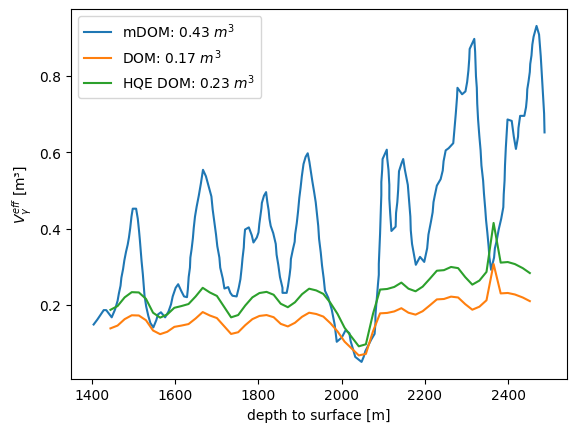

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(depth_md, effvol_md, label = r"mDOM: {:.2f} $m^3$".format(effvol_md.mean()))
ax.plot(depth_i3, effvol_i3, label = r"DOM: {:.2f} $m^3$".format(effvol_i3.mean()))
ax.plot(depth_i3, effvol_dc, label = r"HQE DOM: {:.2f} $m^3$".format(effvol_dc.mean()))
ax.set_xlabel("depth to surface [m]")
ax.set_ylabel(r"$V_{\gamma}^{eff}$ [m³]")
ax.legend()
plt.show()

In [5]:
depth_md = 1948.07-depth_md
data = np.array([depth_md, effvol_md])
np.savetxt("mDOM_eff_vol.txt", data.T, delimiter = " ", newline = "\n", fmt = ["%3.2f","%0.10f"])